# Projet Traitement du Signal

In [257]:
import numpy as np
from scipy import integrate
from math import *
import matplotlib.pyplot as plt
import scipy.signal as sig

f_c = 10
B = 0.5
N = 1000
dt = 0.01

DSB-SC : Double-Side Band - Suppressed Carrier.
Le signal porteur est le signal en $cos(2\pi f_c t)$. Il va permettre de transmettre le signal 

Après modulation et démodulation, on a le signal suivant :

\begin{array}{r c l}
  x_{md}(t)  & = & x(t)cos(2\pi f_c t)^2 \\
   & = & x(t)\frac{1}{2}[1+cos(4\pi f_c t)] \\
\end{array}


Donc pour retrouver le signal d'origine $x(t)$, il suffit de couper la partie en $cos(4\pi f_c t)$ dans l'expression de $x_{md}(t)$ à l'aide d'un filtre passe bas de fréquence de coupure inférieure à $2f_c$ mais supérieure à $B$ pour garder les fréquences du signal d'origine.
On choisira donc cette fréquence de coupure à $2B$.

In [279]:
def f1(t,theta):
    return exp(t*np.cos(theta))

def I(t):
    '''fonction de bessel modifiée d'ordre 0'''
    res1,_=integrate.quad(f1,0,pi,args=(t))
    return (1/pi)*res1

def signal(t,alpha=6):
    '''on choisit une fenètre de type Kaiser'''
    if np.abs(t)<=B/2:
        return I(pi*alpha*sqrt(1-(2*t/B)**2))/I(pi*alpha)
    else:
        return 0
    
T = np.linspace(-6, 6, N)

x = np.array([signal(t) for t in T])
x = np.cos(2*np.pi*B*T) + 2*np.cos(2*np.pi*2.4*B*T + 3)

#x = np.cos(2*np.pi*T)
x_m = x*np.cos(2*np.pi*f_c*T)

In [280]:
x_md = np.cos(2*np.pi*f_c*T)*x_m

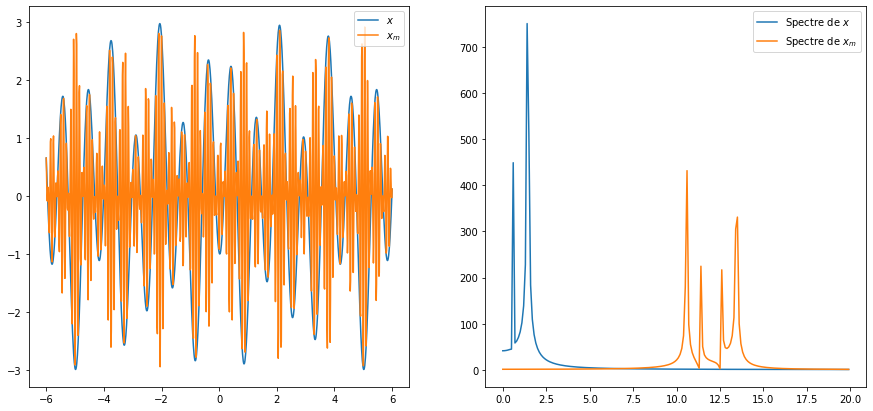

In [292]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x, label='$x$')
plt.plot(T, x_m, label='$x_m$')
#plt.plot(T, x_md, label='$x_{md}$')
plt.legend()

#Affichage du spectre
freqs = np.linspace(0,2*np.pi*(N-1)/N/dt,N)/2/np.pi
plt.subplot(1,2,2)
#plt.plot(freqs[:N//20], np.abs(np.fft.fft(x)[:N//20]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x)[:N//5]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
#plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.legend()

In [288]:
def Filtre_PB(y, dt, N_filter, fc, plot = True):
    num_low, den_low = sig.butter(N_filter, fc, btype='lowpass', fs=1/dt)   
    y_low = sig.filtfilt(num_low, den_low, y)
    return y_low

In [289]:
x_mdf = Filtre_PB(x_md, 0.1, 2, 2*B)

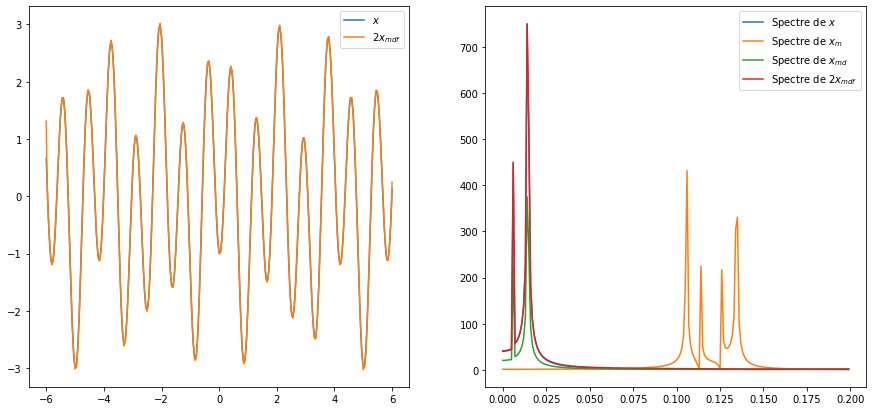

In [290]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x, label='$x$')
#plt.plot(T, x_m, label='$x_m$')
#plt.plot(T, x_md, label='$x_{md}$')
plt.plot(T, 2*x_mdf, label='$2x_{mdf}$')
plt.legend()

#Affichage du spectre
freqs = np.arange(1000)/1000
plt.subplot(1,2,2)
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x)[:N//5]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(2*x_mdf)[:N//5]), label='Spectre de $2x_{mdf}$')
plt.legend()

## Etude avec un sinus ##
Dans la suite nous reprenons tout ce qu'on a fait précédemment avec des sinus au lieu des cosinus :

In [270]:
x_m = x*np.sin(2*np.pi*f_c*T)

In [271]:
x_md = np.cos(2*np.pi*f_c*T)*x_m

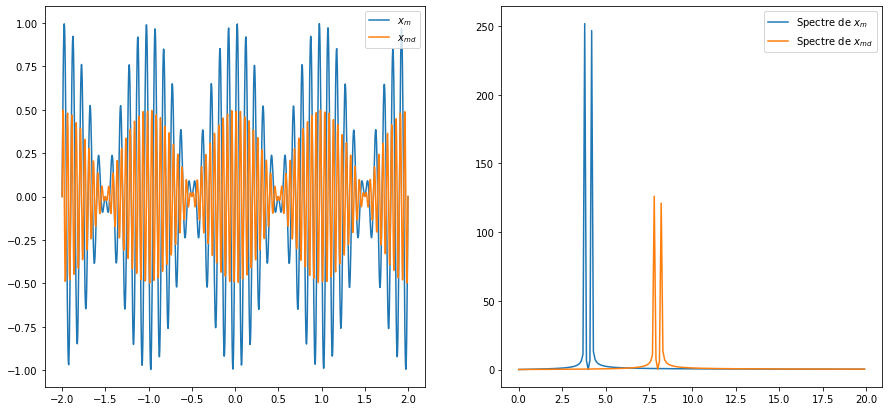

In [272]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.legend()

#Affichage du spectre
freqs = np.linspace(0,2*np.pi*(N-1)/N/dt,N)/2/np.pi
plt.subplot(1,2,2)
#plt.plot(freqs[:N//20], np.abs(np.fft.fft(x)[:N//20]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.legend()

In [200]:
x_mdf = Filtre_PB(x_md, 0.1, 2, 0.25)

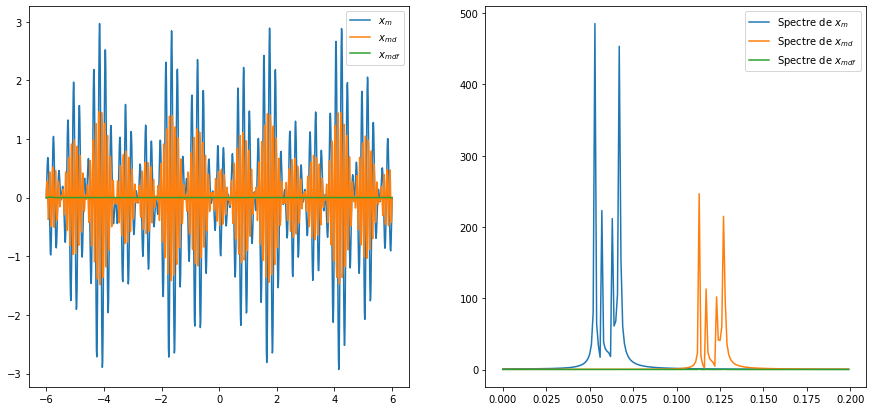

In [201]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.plot(T, x_mdf, label='$x_{mdf}$')
plt.legend()

#Affichage du spectre
freqs = np.arange(1000)/1000
plt.subplot(1,2,2)
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_mdf)[:N//5]), label='Spectre de $x_{mdf}$')
plt.legend()

# II. Modulation et démodulation QAM (Quadrature Amplitude Modulation)

In [29]:
x1 = x
xQ = 2*x

In [30]:
x_m = np.cos(2*np.pi*f_c*T)*x1 + np.sin(2*np.pi*f_c*T)*xQ

In [35]:
x_md = np.cos(2*np.pi*f_c*T)*np.cos(2*np.pi*f_c*T)*x1 + np.sin(2*np.pi*f_c*T)*np.sin(2*np.pi*f_c*T)*xQ

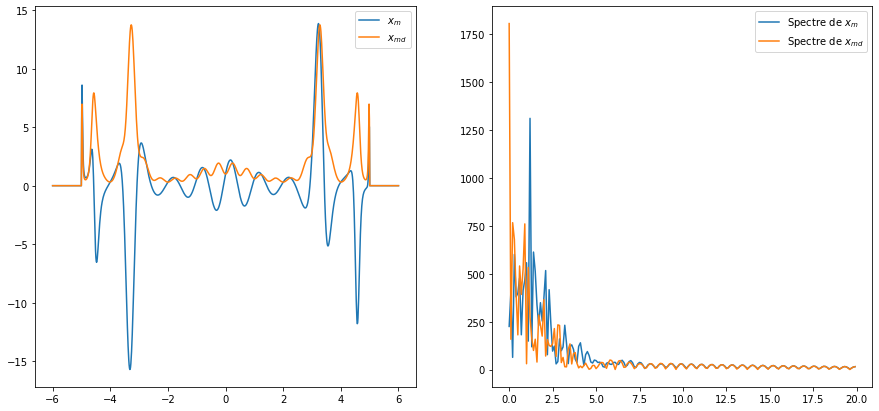

In [36]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.legend()

#Affichage du spectre
freqs = np.linspace(0,2*np.pi*(N-1)/N/dt,N)/2/np.pi
plt.subplot(1,2,2)
#plt.plot(freqs[:N//20], np.abs(np.fft.fft(x)[:N//20]), label='Spectre de $x$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.legend()

In [37]:
x_mdf = Filtre_PB(x_md, 0.1, 2, 0.25)

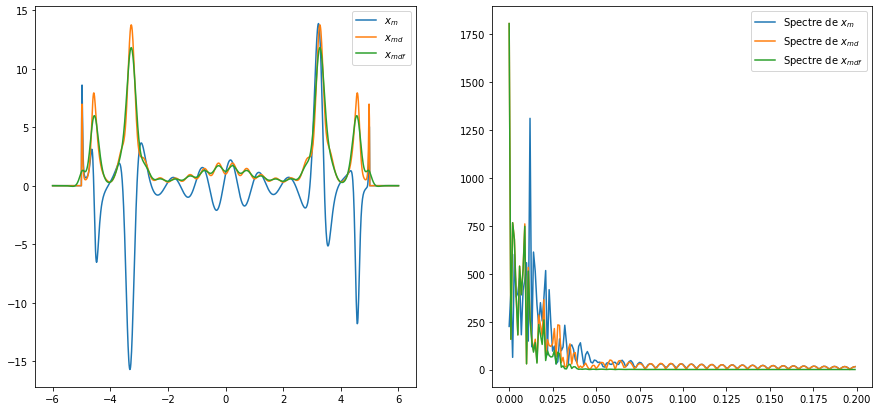

In [38]:
#Affichage du signal
plt.figure(figsize = (15, 7))
plt.subplot(1,2,1)
plt.plot(T, x_m, label='$x_m$')
plt.plot(T, x_md, label='$x_{md}$')
plt.plot(T, x_mdf, label='$x_{mdf}$')
plt.legend()

#Affichage du spectre
freqs = np.arange(1000)/1000
plt.subplot(1,2,2)
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_m)[:N//5]), label='Spectre de $x_m$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_md)[:N//5]), label='Spectre de $x_{md}$')
plt.plot(freqs[:N//5], np.abs(np.fft.fft(x_mdf)[:N//5]), label='Spectre de $x_{mdf}$')
plt.legend()